In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = r'C:\Users\piyus\Desktop\CLTV\cltv_clustered.csv'
df= pd.read_csv(data)
print(df.head())

   claim_amount  vintage Gender   Area  marital_status type_of_policy  \
0           555        5   Male  Urban               0         Silver   
1           625        5   Male  Urban               0         Silver   
2           821        5   Male  Urban               0         Silver   
3          1498        5   Male  Urban               0         Silver   
4           559        5   Male  Urban               0         Silver   

          income qualification policy num_policies   cltv  Cluster  
0  More than 10L       Masters      a            1   5263        0  
1  More than 10L     Bachelors      a  More than 1   6064        0  
2  More than 10L     Bachelors      a  More than 1   8314        0  
3  More than 10L       Masters      c            1  13995        0  
4  More than 10L     Bachelors      a            1   4822        0  


In [3]:
df.head()

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income,qualification,policy,num_policies,cltv,Cluster
0,555,5,Male,Urban,0,Silver,More than 10L,Masters,a,1,5263,0
1,625,5,Male,Urban,0,Silver,More than 10L,Bachelors,a,More than 1,6064,0
2,821,5,Male,Urban,0,Silver,More than 10L,Bachelors,a,More than 1,8314,0
3,1498,5,Male,Urban,0,Silver,More than 10L,Masters,c,1,13995,0
4,559,5,Male,Urban,0,Silver,More than 10L,Bachelors,a,1,4822,0


In [5]:
df.shape

(1017209, 12)


Insight 1 -
Cluster 1 has lowest claim amout , whereas cluster 0 and 2 has high average claim amount around 700

In [6]:

df.groupby('Cluster')['claim_amount'].mean().reset_index()

,Cluster,claim_amount
0,0,700.296564
1,1,424.426304
2,2,726.709829


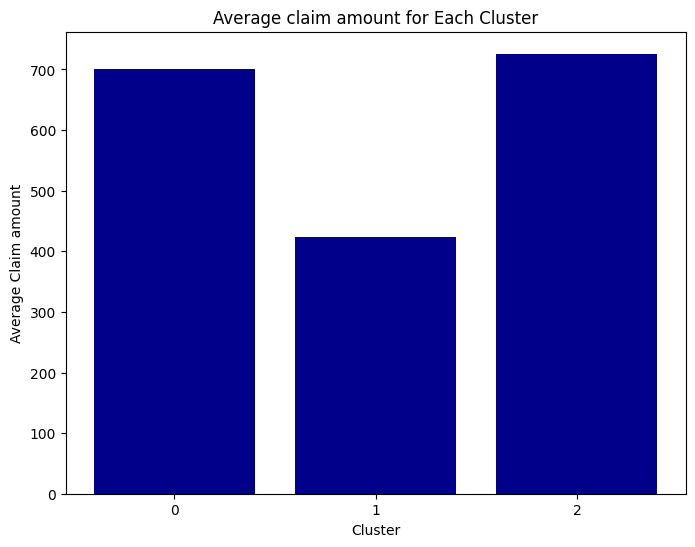

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [700 , 424, 726]
}

df_1 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df_1['Cluster'], df_1['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Average Claim amount')
plt.title('Average claim amount for Each Cluster')
plt.xticks(df_1['Cluster'])
plt.show()


Insight 2 -
Cluster 1 has lowest average cltv , whereas cluster 0 and 2 has high average cltv amount

In [8]:

df.groupby('Cluster')['cltv'].mean().reset_index()

,Cluster,cltv
0,0,6287.098601
1,1,4006.613850
2,2,6602.754285


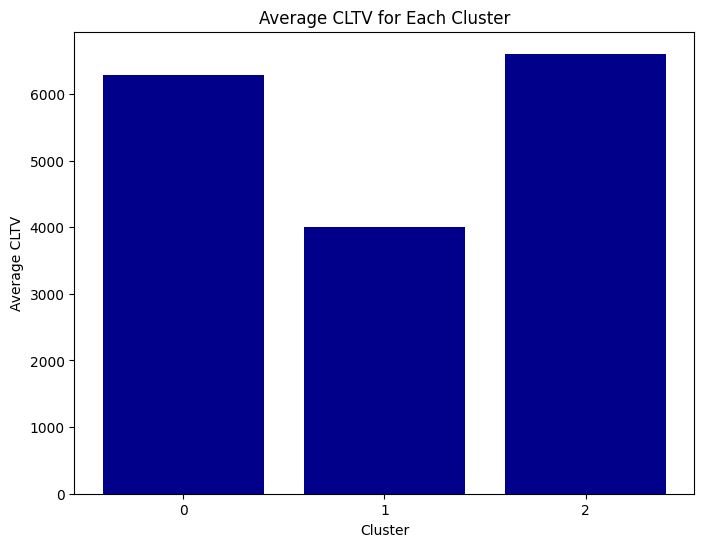

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [6287.098601, 4006.613850, 6602.754285]
}

df_2 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df_2['Cluster'], df_2['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Average CLTV')
plt.title('Average CLTV for Each Cluster')
plt.xticks(df_2['Cluster'])
plt.show()

cluster distribution

In [11]:
df.groupby('Cluster')['cltv'].mean().reset_index()

,Cluster,cltv
0,0,6287.098601
1,1,4006.613850
2,2,6602.754285


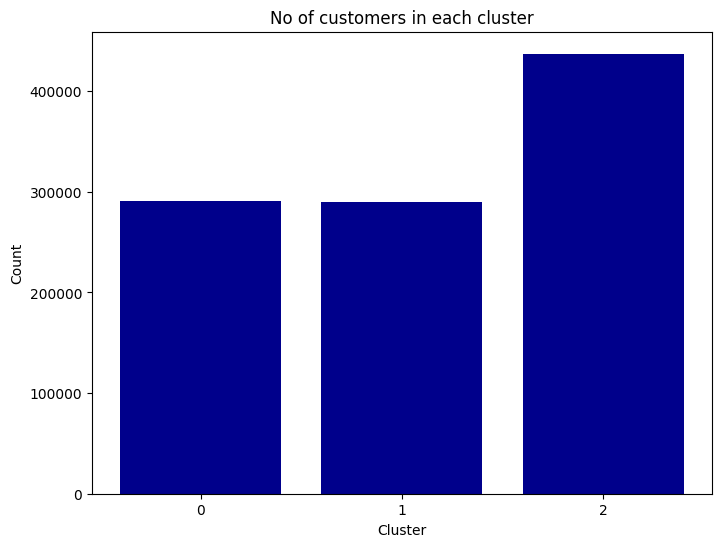

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [290575, 289460, 437174]
}

df_3 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df_3['Cluster'], df_3['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('No of customers in each cluster')
plt.xticks(df_3['Cluster'])
plt.show()

In [13]:


df['qualification'].value_counts()

qualification
Bachelors      551627
High School    312912
Masters        136840
Others          15830
Name: count, dtype: int64

In [14]:
cluster_num_policies_counts = df.groupby(['Cluster', 'qualification'])['qualification'].count()
print(cluster_num_policies_counts)

Cluster  qualification
0        Bachelors        157570
         High School       89400
         Masters           39084
         Others             4521
1        Bachelors        156968
         High School       89052
         Masters           38936
         Others             4504
2        Bachelors        237089
         High School      134460
         Masters           58820
         Others             6805
Name: qualification, dtype: int64


In [15]:

df['income'].value_counts()

income
0-5L             406974
5-10L            373855
More than 10L    236380
Name: count, dtype: int64

In [16]:

cluster_num_policies_counts = df.groupby([ 'income' , "Cluster"])['Cluster'].count()
print(cluster_num_policies_counts)
     


income         Cluster
0-5L           0          115960
               1          115960
               2          175054
5-10L          0          106600
               1          106600
               2          160655
More than 10L  0           68015
               1           66900
               2          101465
Name: Cluster, dtype: int64


Insight 3 -
Cluster 2 predominates in the number of silver policies

In [17]:

cluster_num_policies_counts = df.groupby([ 'type_of_policy' , "Cluster"])['Cluster'].count()
print(cluster_num_policies_counts)

type_of_policy  Cluster
Gold            0          251616
                1          252676
                2          331196
Silver          0           38959
                1           36784
                2          105978
Name: Cluster, dtype: int64


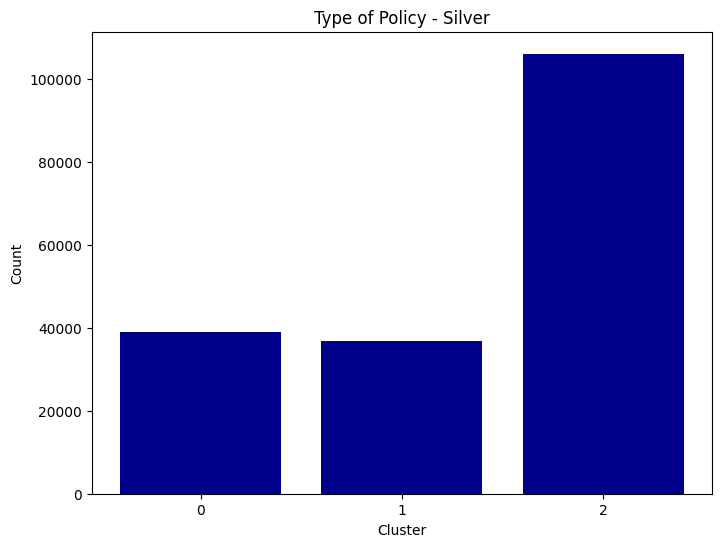

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [38959, 36784, 105978 ]
}

df_4 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df_4['Cluster'], df_4['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Type of Policy - Silver')
plt.xticks(df_4['Cluster'])
plt.show()

Insight 4 -
Cluster 2 predominates in the number of married customers as compared to Clusters 0 and 1

In [19]:
df['marital_status'].value_counts()

marital_status
0    986159
1     31050
Name: count, dtype: int64

In [20]:

cluster_num_policies_counts = df.groupby([ 'marital_status' , "Cluster"])['Cluster'].count()
print(cluster_num_policies_counts)

marital_status  Cluster
0               0          283100
                1          282152
                2          420907
1               0            7475
                1            7308
                2           16267
Name: Cluster, dtype: int64


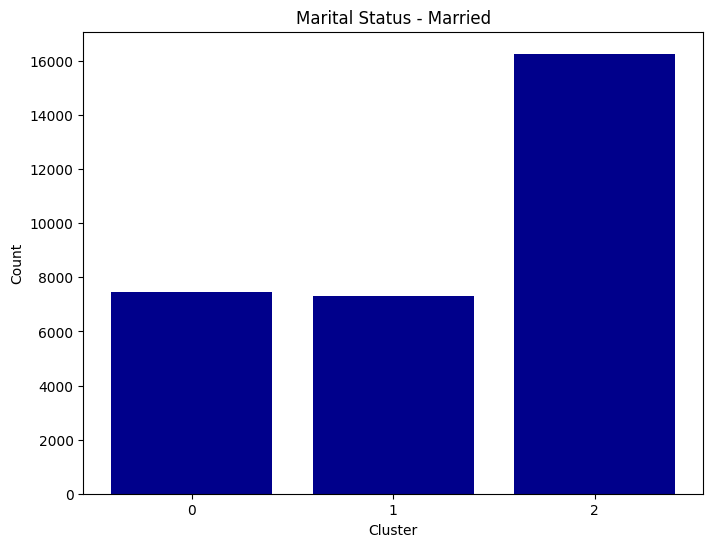

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [7475, 7308, 16267 ]
}

df_5 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df_5['Cluster'], df_5['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Marital Status - Married')
plt.xticks(df_5['Cluster'])
plt.show()


Insight 5 -
The graphs show that while rural customer distribution is relatively balanced across clusters, urban customers are significantly more prevalent in Cluster 2.

In [22]:
cluster_num_policies_counts = df.groupby([ 'Area' , "Cluster"])['Cluster'].count()
print(cluster_num_policies_counts)

Area   Cluster
Rural  0          212995
       1          211700
       2          204434
Urban  0           77580
       1           77760
       2          232740
Name: Cluster, dtype: int64


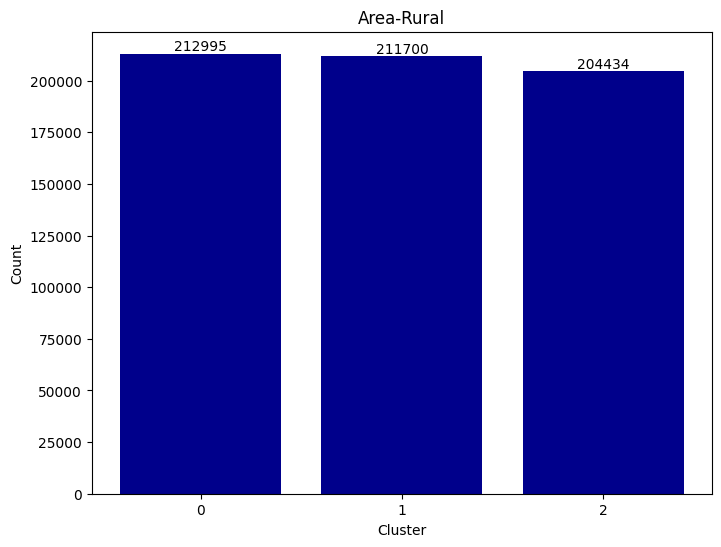

In [23]:


import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [212995, 211700, 204434]
}

df_6 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
bars = plt.bar(df_6['Cluster'], df_6['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Area-Rural')
plt.xticks(df_6['Cluster'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

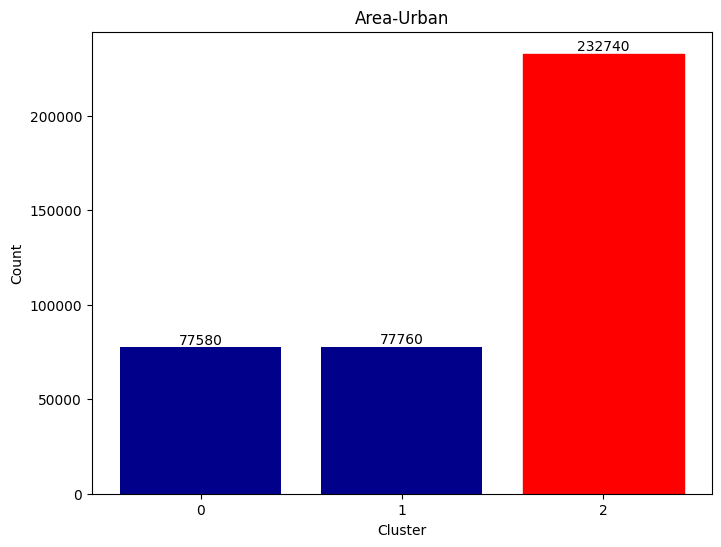

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [77580, 77760, 232740]
}

df_7 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
bars = plt.bar(df_7['Cluster'], df_7['cltv'], color='darkblue')
bars[2].set_color('red')  # Set color of the bar corresponding to Cluster 2 to red
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Area-Urban')
plt.xticks(df_7['Cluster'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

     


Insight 5 -
The bar charts show gender distribution across clusters, with Cluster 1 having the highest number of female customers and Cluster 2 the highest number of male customers.



In [25]:
cluster_num_policies_counts = df.groupby([ 'Gender' , "Cluster"])['Cluster'].count()
print(cluster_num_policies_counts)

Gender  Cluster
Female  0            7877
        1          148307
        2           16633
Male    0          282698
        1          141153
        2          420541
Name: Cluster, dtype: int64


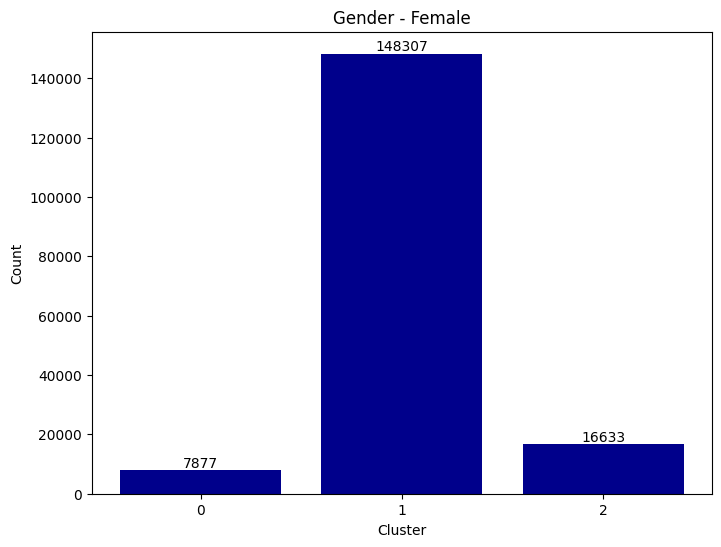

In [26]:

import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [7877, 148307, 16633]
}

df_8 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
bars = plt.bar(df_8['Cluster'], df_8['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender - Female')
plt.xticks(df_8['Cluster'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

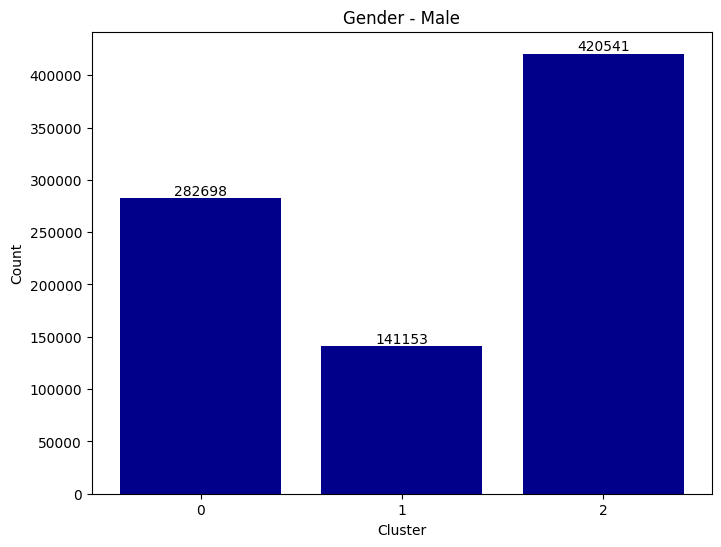

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Cluster': [0, 1, 2],
    'cltv': [282698, 141153, 420541]
}

df_9 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
bars = plt.bar(df_9['Cluster'], df_9['cltv'], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender - Male')
plt.xticks(df_9['Cluster'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [28]:


cluster_num_policies_counts = df.groupby([ 'vintage' , "Cluster"])['Cluster'].count()
print(cluster_num_policies_counts)

vintage  Cluster
0        1          144730
1        1          144730
2        2          145664
3        2          145665
4        2          145845
5        0          145845
6        0          144730
Name: Cluster, dtype: int64
